In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小

In [2]:
def hand_col(df,col ="发动机转速",n=240):
    
    ####计算col停顿时间
    df["last_notna_time"] = df[df[col].notna()].Time   ##当时不是na的时间
    df_notna_time = df[df[col].notna()].Time
    df_notna_time_diff = (df_notna_time - df_notna_time.shift(1)).dt.total_seconds()
    df["last_notna_time_diff"] = df_notna_time_diff
    df["last_notna_time_diff"] = df["last_notna_time_diff"].fillna(method = "bfill")
    
    df.loc[df["last_notna_time_diff"]> n,col] = df.loc[df["last_notna_time_diff"]> n,col].fillna(0)  #长时间na的填充0
    df[col] = df[col].fillna(method = "ffill")
    return df

In [3]:
def cz(df,idx,col="累计油耗"):
    num = len(idx)
    for i in range(num-1):
        start = idx.iloc[i]
        end = idx.iloc[i+1]
        cz_num = end-start
        start_num = df.loc[start,col]
        end_num = df.loc[end,col]
        fillna = np.linspace(start_num,end_num,cz_num+1)
        df.loc[start:end,col] = fillna
    return df

In [4]:
def hand_col_cz(df,col ="累计油耗"):   ###插值处理
    
    ####计算col停顿间隔
    df["last_notna_idx"] = df[df[col].notna()].idx   ##当时不是na的idx
    df_notna_idx = df[df[col].notna()].idx
    df_notna_idx_diff = (df_notna_idx - df_notna_idx.shift(1))
    df["last_notna_idx_diff"] = df_notna_idx_diff
    df["last_notna_idx_diff"] = df["last_notna_idx_diff"].fillna(method = "bfill")
    
    df.loc[df["last_notna_time_diff"]> n,col] = df.loc[df["last_notna_time_diff"]> n,col].fillna(0)  #长时间na的填充0
    df[col] = df[col].fillna(method = "ffill")
    return df

In [5]:
def hand(df):
    df = df.drop(["GPS纬度","GPS经度","GPS定位时间"],axis=1)#去除无用数据
    df["Time"] = pd.to_datetime(df["time"].str[:-3])#时间转化,直接去掉小数部分
    
    ####停机以发动机数据为准,处理缺失发动机转数
    df = hand_col(df,col ="发动机转速",n=240)
    
    df = hand_col(df,col ="系统压力",n=240)
    
    df = hand_col(df,col ="转向次数",n=240)
    
    df = hand_col(df,col ="泵送排量",n=240)
    
    df = hand_col(df,col ="泵车状态",n=120)
    
    ####油耗单独填充,插值
    df_notna_idx = df[df["累计油耗"].notna()].idx
    df = cz(df,df_notna_idx,col="累计油耗")
    ###
    
    
    ####泵送计时填充
    df["累计时间"] = df["累计时间"].fillna(method = "ffill")
    
    #####泵送状态，待了解不同状态的代号
    
    ####液压油温用插值
    df_notna_idx = df[df["液压油温"].notna()].idx
    df = cz(df,df_notna_idx,col="液压油温")
    return df
    
    
  

In [6]:
df = pd.read_csv("data.csv",skiprows=1)
df["Time"] = pd.to_datetime(df["time"].str[:-3])#时间转化,直接去掉小数部分
df["idx"] = np.arange(len(df))

In [7]:
df = hand(df)

In [8]:
df = df.dropna()

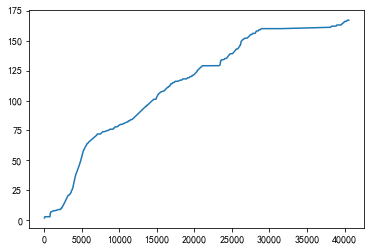

In [38]:
df["累计油耗"].plot()

In [39]:
df

,time,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,Time,idx,last_notna_time,last_notna_time_diff
2,2019-07-28 01:31:59.80,50.0,0.0,2.000000,0.0,560.0,0.0,0.00,0.0,2019-07-28 01:31:59,2,2019-07-28 01:31:59,2.0
5,2019-07-28 01:32:01.54,50.0,0.0,2.050000,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:01,5,2019-07-28 01:32:01,2.0
6,2019-07-28 01:32:02.52,50.0,0.0,2.066667,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:02,6,2019-07-28 01:32:02,1.0
7,2019-07-28 01:32:03.52,50.0,0.0,2.083333,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:03,7,2019-07-28 01:32:03,1.0
8,2019-07-28 01:32:04.54,50.0,0.0,2.100000,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:04,8,2019-07-28 01:32:04,1.0
9,2019-07-28 01:32:05.53,50.0,0.0,2.116667,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:05,9,2019-07-28 01:32:05,1.0
10,2019-07-28 01:32:06.56,50.0,0.0,2.133333,0.0,555.0,0.0,0.00,0.0,2019-07-28 01:32:06,10,2019-07-28 01:32:06,1.0
11,2019-07-28 01:32:07.60,50.0,0.0,2.150000,0.0,545.0,0.0,0.00,0.0,2019-07-28 01:32:07,11,2019-07-28 01:32:07,1.0
12,2019-07-28 01:32:08.60,50.0,0.0,2.166667,0.0,537.0,0.0,0.00,0.0,2019-07-28 01:32:08,12,2019-07-28 01:32:08,1.0
13,2019-07-28 01:32:09.64,50.0,0.0,2.183333,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:09,13,2019-07-28 01:32:09,1.0


# 生成时间序列

In [9]:
df["second"] = df.Time.apply(lambda x: time.mktime(x.timetuple()))
second_start = df.iloc[0].second
df["five_second"] = (df.second - second_start)  // 5

In [10]:
df

,time,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,Time,idx,last_notna_time,last_notna_time_diff,second,five_second
2,2019-07-28 01:31:59.80,50.0,0.0,2.000000,0.0,560.0,0.0,0.00,0.0,2019-07-28 01:31:59,2,2019-07-28 01:31:59,2.0,1.564249e+09,0.0
5,2019-07-28 01:32:01.54,50.0,0.0,2.050000,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:01,5,2019-07-28 01:32:01,2.0,1.564249e+09,0.0
6,2019-07-28 01:32:02.52,50.0,0.0,2.066667,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:02,6,2019-07-28 01:32:02,1.0,1.564249e+09,0.0
7,2019-07-28 01:32:03.52,50.0,0.0,2.083333,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:03,7,2019-07-28 01:32:03,1.0,1.564249e+09,0.0
8,2019-07-28 01:32:04.54,50.0,0.0,2.100000,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:04,8,2019-07-28 01:32:04,1.0,1.564249e+09,1.0
9,2019-07-28 01:32:05.53,50.0,0.0,2.116667,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:05,9,2019-07-28 01:32:05,1.0,1.564249e+09,1.0
10,2019-07-28 01:32:06.56,50.0,0.0,2.133333,0.0,555.0,0.0,0.00,0.0,2019-07-28 01:32:06,10,2019-07-28 01:32:06,1.0,1.564249e+09,1.0
11,2019-07-28 01:32:07.60,50.0,0.0,2.150000,0.0,545.0,0.0,0.00,0.0,2019-07-28 01:32:07,11,2019-07-28 01:32:07,1.0,1.564249e+09,1.0
12,2019-07-28 01:32:08.60,50.0,0.0,2.166667,0.0,537.0,0.0,0.00,0.0,2019-07-28 01:32:08,12,2019-07-28 01:32:08,1.0,1.564249e+09,1.0
13,2019-07-28 01:32:09.64,50.0,0.0,2.183333,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:09,13,2019-07-28 01:32:09,1.0,1.564249e+09,2.0


In [11]:
df_mean = df.drop("time",axis=1).groupby("five_second").mean()

In [12]:
df_mean

,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,idx,last_notna_time_diff,second
five_second,,,,,,,,,,,
0.0,50.0,0.0,2.050000,0.0,559.00,0.0,0.00,0.0,5.000000,1.500000,1.564249e+09
1.0,50.0,0.0,2.133333,0.0,550.60,0.0,0.00,0.0,10.000000,1.000000,1.564249e+09
2.0,50.0,0.0,2.212500,0.0,560.50,0.0,0.00,0.0,14.750000,1.250000,1.564249e+09
3.0,50.0,0.0,2.308333,0.0,563.75,0.0,0.00,0.0,20.500000,1.250000,1.564249e+09
4.0,50.0,0.0,2.383333,0.0,569.80,0.0,0.00,0.0,25.000000,1.000000,1.564249e+09
5.0,50.0,0.0,2.466667,0.0,556.00,0.0,0.00,0.0,30.000000,1.000000,1.564249e+09
6.0,50.0,0.0,2.541667,0.0,561.25,0.0,0.00,0.0,34.500000,1.250000,1.564249e+09
7.0,50.0,0.0,2.608333,0.0,559.75,0.0,0.00,0.0,38.500000,1.000000,1.564249e+09
8.0,50.0,0.0,2.700000,0.0,555.80,0.0,0.00,0.0,44.000000,1.200000,1.564249e+09


In [13]:
start = df.iloc[0].second
end = df.iloc[-1].second
second_index = np.arange(start,end,5)

In [14]:
second_idx = pd.DataFrame({"second_idx":second_index})

In [15]:
len(second_idx)

45423

In [16]:
new_df = second_idx.join(df_mean)

In [17]:
new_df["发动机转速"] = new_df["发动机转速"].fillna(0)

In [18]:
new_df["累计油耗"] = new_df["累计油耗"].fillna(method = "bfill")

In [19]:
new_df["系统压力"] = new_df["系统压力"].fillna(0)

In [20]:
new_df["转向次数"] = new_df["转向次数"].fillna(0)

In [21]:
new_df["泵送排量"] = new_df["泵送排量"].fillna(0)

In [22]:
new_df["泵车状态"] = new_df["泵车状态"].fillna(0)   ####不工作状态

In [23]:
new_df["累计时间"] = new_df["累计时间"].fillna(method = "bfill")

In [24]:
####液压油温继续插值补缺

In [25]:
new_df = new_df.reset_index()

In [26]:
df_notna_idx = new_df[new_df["液压油温"].notna()]["index"]

In [27]:
new_df = cz(new_df,df_notna_idx,col="液压油温")

In [28]:
new_df["液压油温"].describe([0.05,0.1])

count    45423.000000
mean        55.298888
std         13.468125
min         38.000000
5%          38.480343
10%         38.960897
50%         56.956660
max         85.000000
Name: 液压油温, dtype: float64

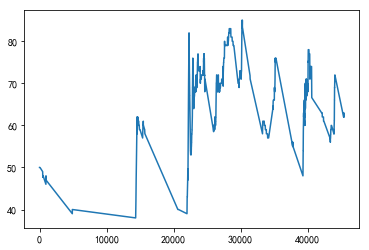

In [29]:
new_df["液压油温"].plot()

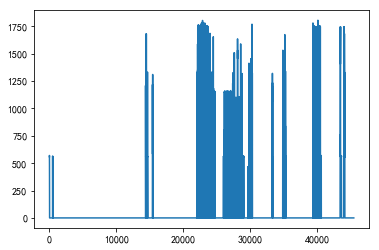

In [30]:
new_df["发动机转速"].plot()

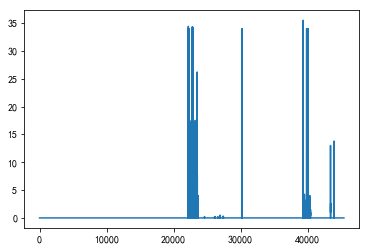

In [31]:
new_df["系统压力"].plot()

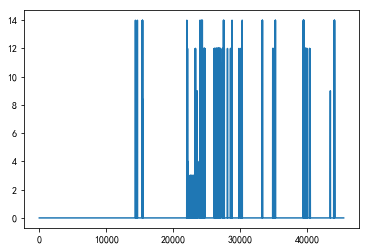

In [33]:
new_df["泵车状态"].plot()